In [1]:
import pandas as pd

df = pd.read_csv('BusinessMasterFile.csv')
df.head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME,RULEYEAR,LEVEL4,ACT1,ACT2,ACT3
0,19818,PALMER SECOND BAPTIST CHURCH,NaN,1050 THORNDIKE ST,PALMER,MA,01069-1507,3125,3,9,...,NaN,NaN,NaN,NaN,3514,1955,NaN,100,0.0,0.0
1,29215,ST GEORGE CATHEDRAL,NaN,523 E BROADWAY,SOUTH BOSTON,MA,02127-4415,2365,3,9,...,NaN,NaN,NaN,NaN,NaN,1972,NaN,100,0.0,0.0
2,587764,IGLESIA BETHESDA INC,NaN,157 ANDOVER ST,LOWELL,MA,01852-2348,0,3,3,...,NaN,NaN,NaN,X21,NaN,2004,X,0,NaN,NaN
3,635913,MINISTERIO APOSTOLICO JESUCRISTO ES EL SENOR INC,NaN,454 ESSEX ST,LAWRENCE,MA,01840-1242,0,3,3,...,NaN,NaN,NaN,X21,NaN,2004,X,0,NaN,NaN
4,765634,MERCY CHAPEL INTERNATIONAL,NaN,75 MORTON VILLAGE DR APT 408,MATTAPAN,MA,02126-2433,0,3,3,...,NaN,NaN,NaN,X20,NaN,2004,X,0,NaN,NaN


In [2]:
import missingno as msno
import matplotlib.pyplot as plt
plt.style.use('ggplot')

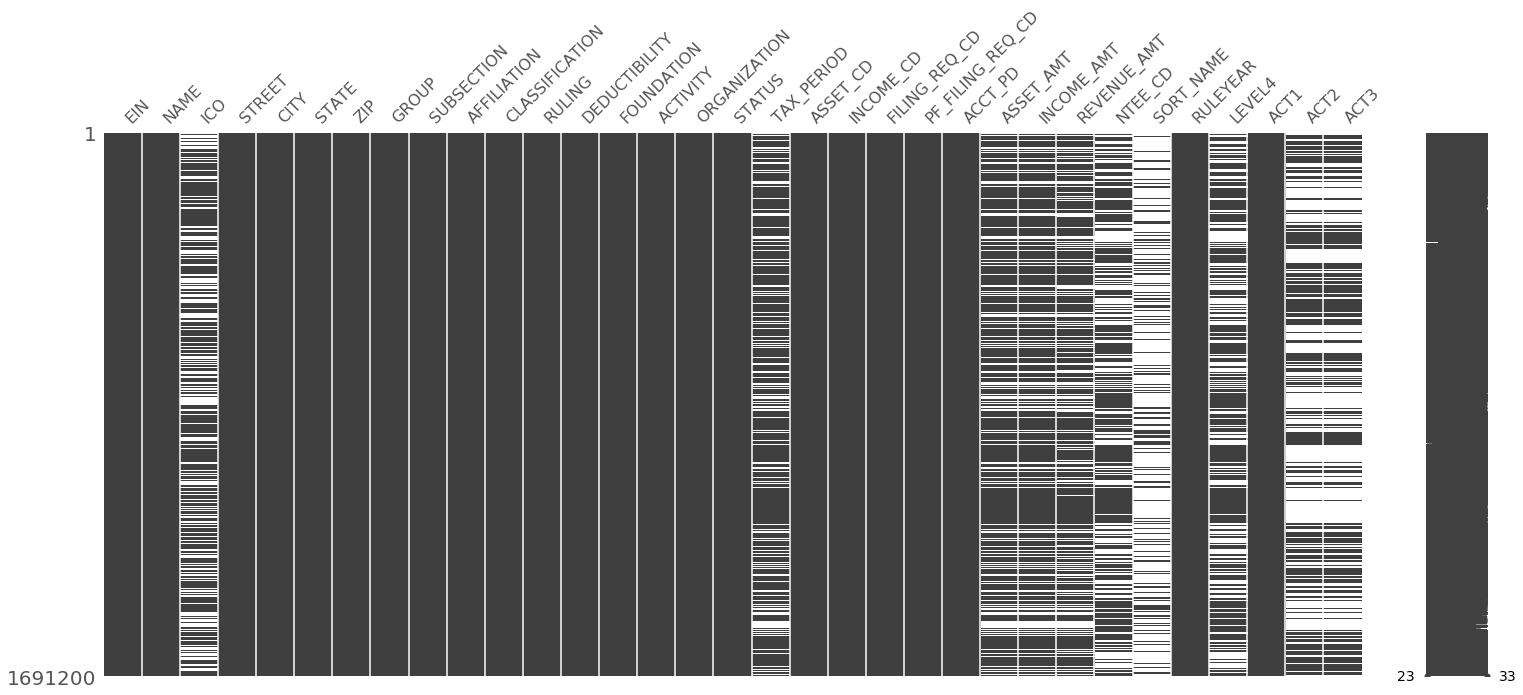

In [3]:
msno.matrix(df)

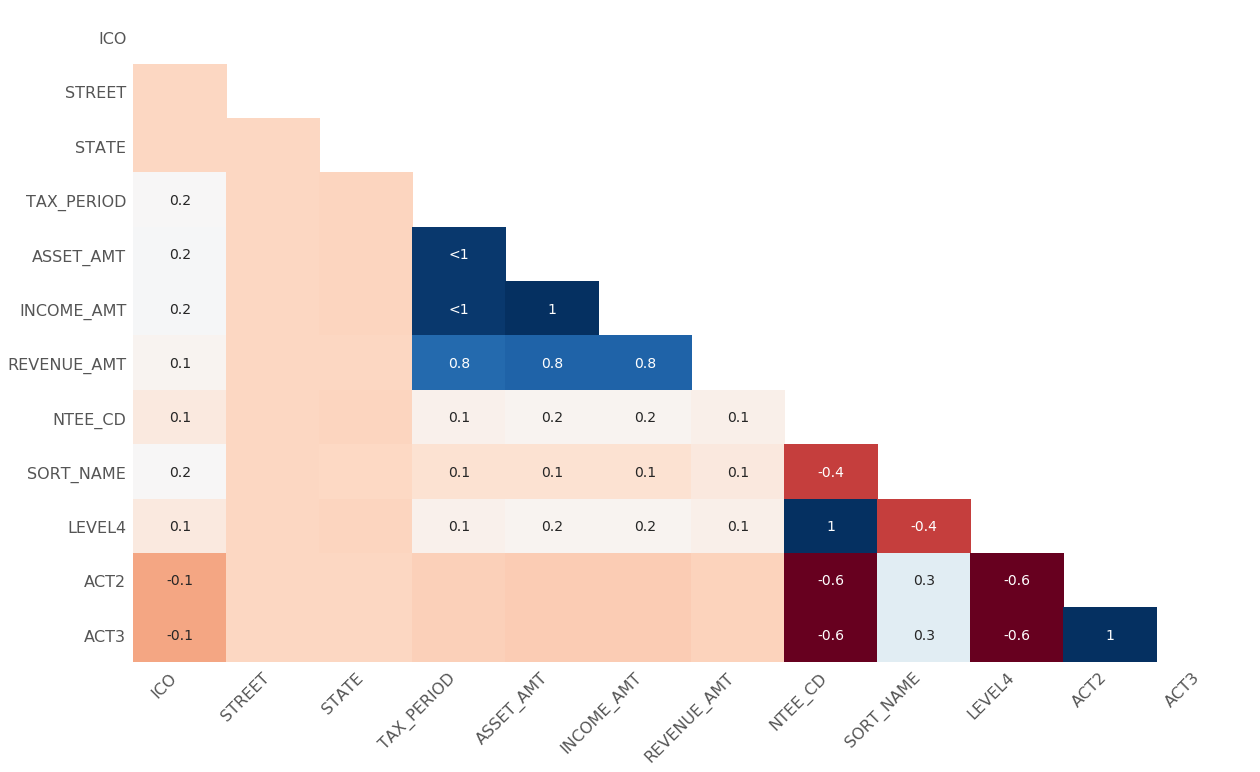

In [4]:
msno.heatmap(df)

In [5]:
df.isna().sum()

EIN                       0
NAME                      0
ICO                  589563
STREET                    2
CITY                      0
STATE                  1267
ZIP                       0
GROUP                     0
SUBSECTION                0
AFFILIATION               0
CLASSIFICATION            0
RULING                    0
DEDUCTIBILITY             0
FOUNDATION                0
ACTIVITY                  0
ORGANIZATION              0
STATUS                    0
TAX_PERIOD           351197
ASSET_CD                  0
INCOME_CD                 0
FILING_REQ_CD             0
PF_FILING_REQ_CD          0
ACCT_PD                   0
ASSET_AMT            368826
INCOME_AMT           368826
REVENUE_AMT          479112
NTEE_CD              645285
SORT_NAME           1254791
RULEYEAR                  0
LEVEL4               645285
ACT1                      0
ACT2                 898743
ACT3                 898743
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691200 entries, 0 to 1691199
Data columns (total 33 columns):
EIN                 int64
NAME                object
ICO                 object
STREET              object
CITY                object
STATE               object
ZIP                 object
GROUP               int64
SUBSECTION          int64
AFFILIATION         int64
CLASSIFICATION      int64
RULING              int64
DEDUCTIBILITY       int64
FOUNDATION          int64
ACTIVITY            int64
ORGANIZATION        int64
STATUS              int64
TAX_PERIOD          float64
ASSET_CD            int64
INCOME_CD           int64
FILING_REQ_CD       int64
PF_FILING_REQ_CD    int64
ACCT_PD             int64
ASSET_AMT           float64
INCOME_AMT          float64
REVENUE_AMT         float64
NTEE_CD             object
SORT_NAME           object
RULEYEAR            int64
LEVEL4              object
ACT1                int64
ACT2                float64
ACT3                float64
dtypes: 

Tasks:
- Combine `city`, `street`, `state` into lat and longs. Drop `city`, `street`, `state`. This is the location of the headquarters and doesn't mean that the 501c has operations in that state. [https://github.com/geopy/geopy]
- Change datetime data into correct formats. `TAX_PERIOD`, `RULING_DATE`
- Investigate any connection between SORT_NAME and GROUP EXEMPTION NUM and AFFILCATION CODE [Connection?](#task1)
- Check the Ruling year after 1995 and see if any NTEE exisits.


<a id="task1"></a>

Sort Name Line is another name under which the organization does business.  Also used for trade names, chapter names, or local numbers for subordinate organizations of group rulings

Central - This code is used if the organization is a central type organization (no group exemption) of a National, Regional or Geographic grouping of organizations. 2 Intermediate - This code is used if the organization is an intermediate organization (no group exemption) of a National, Regional or Geographic grouping of organizations (such as a state headquarters of a national organization). 3 Independent - This code is used if the organization is an independent organization or an independent auxiliary 
(i.e., not affiliated with a National, Regional, or Geographic grouping of organizations). 6 Central - This code is used if the organization is a parent (group ruling) and is not a church or 501(c)(1) organization. 7 Intermediate - This code is used if the organization is a group exemption intermediate organization of a National, Regional or Geographic grouping of organizations. 8 Central - This code is used if the organization is a parent (group ruling) and is a church or 501(c)(1) organization. 9 Subordinate - This code is used if the organization is a subordinate in a group ruling

In [7]:
df.drop(['ICO', 
         'RULING', 
         'ACT2', 
         'ACT3', 
         'INCOME_AMT', 
         'ASSET_AMT', 
         'ASSET_CD', 
         'INCOME_CD', 
         'LEVEL4', 
         'TAX_PERIOD'], axis=1, inplace=True)

In [8]:
df.REVENUE_AMT.value_counts(normalize=True)

0.0            5.682681e-01
1000.0         2.442067e-04
500.0          1.823300e-04
5000.0         1.773799e-04
100.0          1.765548e-04
1.0            1.683046e-04
10000.0        1.526292e-04
2000.0         1.344787e-04
3000.0         1.097280e-04
200.0          1.064279e-04
1500.0         1.006528e-04
2500.0         9.570262e-05
2.0            8.662737e-05
6000.0         8.497733e-05
300.0          8.167724e-05
5.0            8.085222e-05
100000.0       7.920217e-05
50000.0        7.672710e-05
15000.0        7.590208e-05
50.0           7.590208e-05
25000.0        7.507706e-05
20000.0        7.342701e-05
10.0           6.765185e-05
4000.0         6.682683e-05
250.0          6.187670e-05
12000.0        5.775158e-05
30000.0        5.775158e-05
4.0            5.775158e-05
3.0            5.692656e-05
400.0          5.692656e-05
                   ...     
33729.0        8.250226e-07
539663.0       8.250226e-07
539650.0       8.250226e-07
8634390.0      8.250226e-07
33728.0        8.250

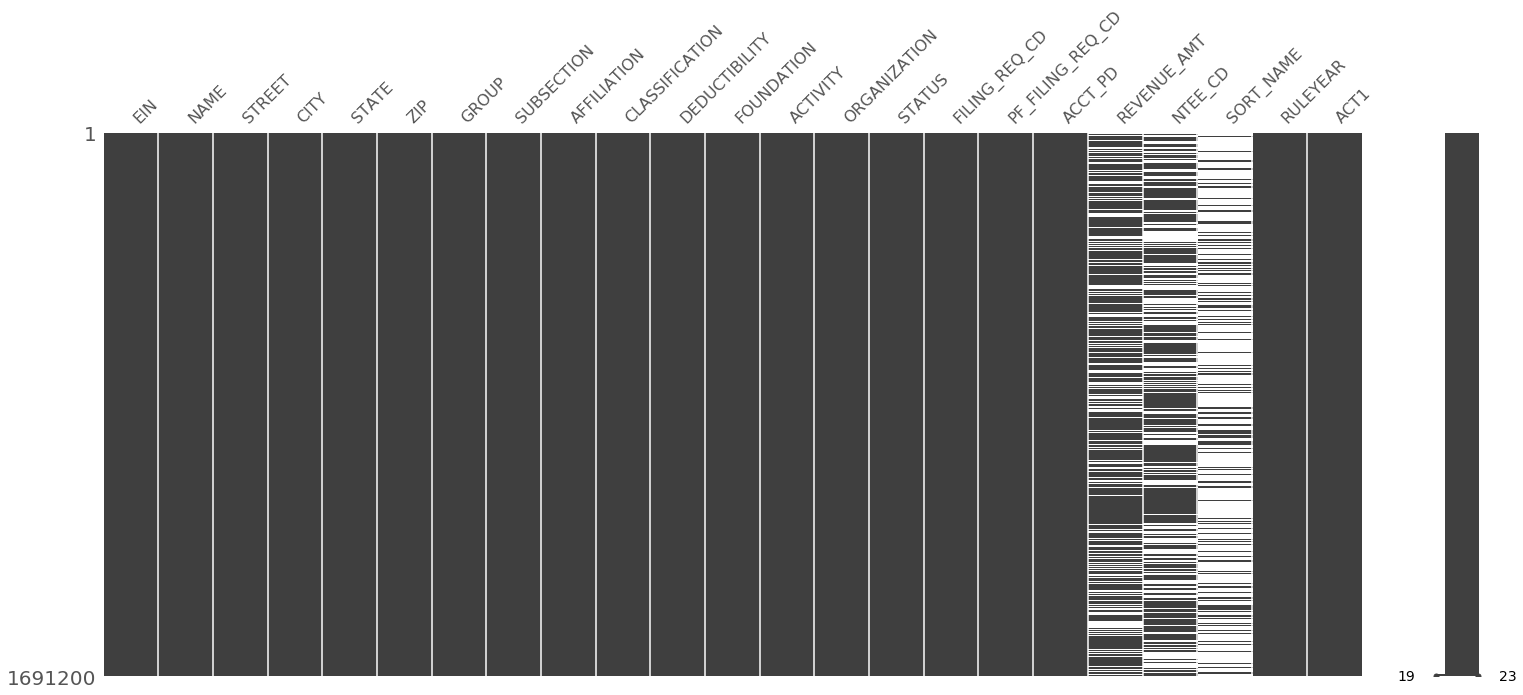

In [9]:
msno.matrix(df)

In [10]:
df.REVENUE_AMT.value_counts()[:5]

0.0        688791
1000.0        296
500.0         221
5000.0        215
100.0         214
1.0           204
10000.0       185
2000.0        163
3000.0        133
200.0         129
1500.0        122
2500.0        116
2.0           105
6000.0        103
300.0          99
5.0            98
Name: REVENUE_AMT, dtype: int64

In [11]:
df = df.dropna(subset=['REVENUE_AMT'])

In [12]:
df.isna().sum()

EIN                      0
NAME                     0
STREET                   2
CITY                     0
STATE                  940
ZIP                      0
GROUP                    0
SUBSECTION               0
AFFILIATION              0
CLASSIFICATION           0
DEDUCTIBILITY            0
FOUNDATION               0
ACTIVITY                 0
ORGANIZATION             0
STATUS                   0
FILING_REQ_CD            0
PF_FILING_REQ_CD         0
ACCT_PD                  0
REVENUE_AMT              0
NTEE_CD             415581
SORT_NAME           868547
RULEYEAR                 0
ACT1                     0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212088 entries, 12 to 1691194
Data columns (total 23 columns):
EIN                 1212088 non-null int64
NAME                1212088 non-null object
STREET              1212086 non-null object
CITY                1212088 non-null object
STATE               1211148 non-null object
ZIP                 1212088 non-null object
GROUP               1212088 non-null int64
SUBSECTION          1212088 non-null int64
AFFILIATION         1212088 non-null int64
CLASSIFICATION      1212088 non-null int64
DEDUCTIBILITY       1212088 non-null int64
FOUNDATION          1212088 non-null int64
ACTIVITY            1212088 non-null int64
ORGANIZATION        1212088 non-null int64
STATUS              1212088 non-null int64
FILING_REQ_CD       1212088 non-null int64
PF_FILING_REQ_CD    1212088 non-null int64
ACCT_PD             1212088 non-null int64
REVENUE_AMT         1212088 non-null float64
NTEE_CD             796507 non-null object
SORT_NAME          

In [15]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()


In [20]:
temp = encode.fit_transform(df.SORT_NAME.astype(str))

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'